In [12]:
import numpy as np
import matplotlib.pyplot as plt
from Plotstyle.utils_k_means import *

%matplotlib inline

In [3]:
#Load the Data
X = np.load("Datasets/ex7_X.npy")

## Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps: 
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

#### Finding Closest Centroids

For every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-norm

In [4]:
def find_closest_centroid(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    # Number of Centroids
    K = centroids.shape[0]

    # Store the Index of the closest centroids
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):

        # Array to Store the Distance
        distance = []

        # Check for All Centroids
        for j in range(K):
            # Compute the Distance
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        
        # Add the Index of the lowest distance
        idx[i] = np.argmin(distance)

    return idx

In [5]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [9]:
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find Centroids
idx = find_closest_centroid(X, initial_centroids)

print(f"The First Three elements in idx are: {idx[:3]}")

The First Three elements in idx are: [0 2 1]


#### Computing Centroid Means

For every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
$C_k$ is the set of examples that are assigned to centroid $k$

$|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [10]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape

    # Create an Array for Centroids
    centroids = np.zeros((K, n))

    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)

    return centroids

In [11]:
K = 3
centroids = compute_centroids(X, idx, K)

print(f"Computed Centroids are: {centroids}")

Computed Centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


### K-Means Algorithms

In [13]:
def run_KMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    
    # Initialize Values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids

    idx = np.zeros(m)
    plt.figure(figsize=(8,6))

    # Run K-Means Algorithms
    for i in range(max_iters):
        
        # Iteration number
        print(f"Iteration Number: {i}, {max_iters-1}")

        idx = find_closest_centroid(X, centroids)

        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
        
        # Compute New Centroids
        centroids = compute_centroids(X, idx, K)
    
    plt.show()
    return centroids, idx

Iteration Number: 0, 9
Iteration Number: 1, 9
Iteration Number: 2, 9


Iteration Number: 3, 9
Iteration Number: 4, 9
Iteration Number: 5, 9
Iteration Number: 6, 9
Iteration Number: 7, 9
Iteration Number: 8, 9
Iteration Number: 9, 9


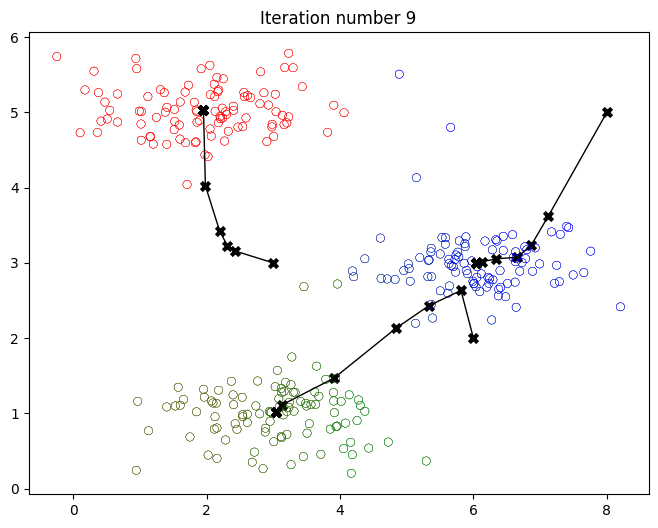

In [15]:
# Load an example dataset
X = np.load("Datasets/ex7_X.npy")

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_KMeans(X, initial_centroids, max_iters, plot_progress=True)

#### Random Initialization
* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`). 
* Then, it selects the first $K$ examples based on the random permutation of the indices. 
* This allows the examples to be selected at random without the risk of selecting the same example twice.

In [26]:
def KMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    randix = np.random.permutation(X.shape[0])

    centroids = X[randix[:K]]
    return centroids

Iteration Number: 0, 9
Iteration Number: 1, 9
Iteration Number: 2, 9
Iteration Number: 3, 9
Iteration Number: 4, 9
Iteration Number: 5, 9
Iteration Number: 6, 9
Iteration Number: 7, 9
Iteration Number: 8, 9
Iteration Number: 9, 9


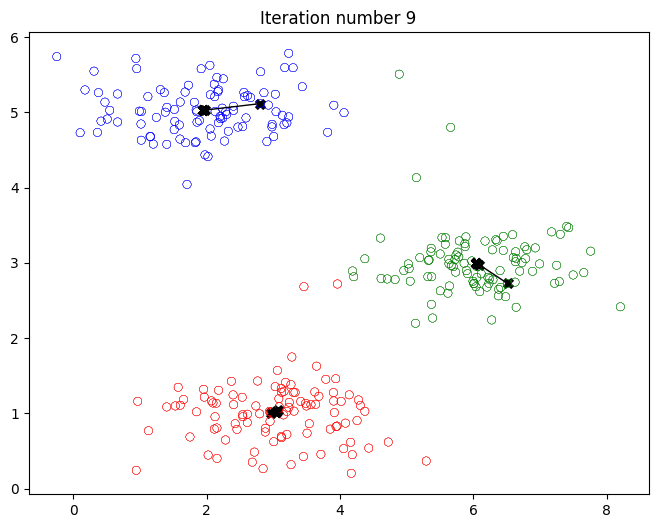

In [33]:
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = KMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_KMeans(X, initial_centroids, max_iters, plot_progress=True)

# Image Compression

In [34]:
# Load an image of a bird
original_img = plt.imread('Datasets/bird_small.png')

In [ ]:
# Check the Image
plt.imshow(original_img)

In [36]:
print(f"Shape of Original Image is : {original_img.shape}")

Shape of Original Image is : (128, 128, 3)


A three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

In [38]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [43]:
K = 16
max_iters = 10

# Find Initial Centroids
initial_centroids = KMeans_init_centroids(X_img, K)

centroids, idx = run_KMeans(X_img, initial_centroids, max_iters, plot_progress=False)

Iteration Number: 0, 9
Iteration Number: 1, 9
Iteration Number: 2, 9
Iteration Number: 3, 9
Iteration Number: 4, 9
Iteration Number: 5, 9
Iteration Number: 6, 9
Iteration Number: 7, 9
Iteration Number: 8, 9
Iteration Number: 9, 9


<Figure size 800x600 with 0 Axes>

In [41]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [5 0 0 0 5]


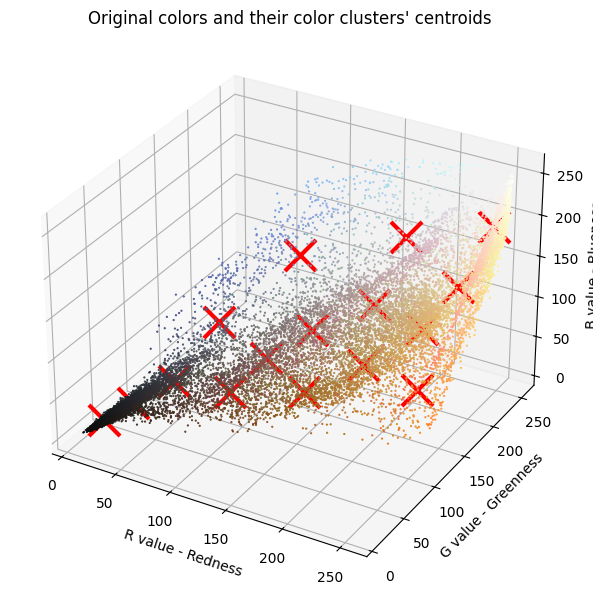

In [54]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

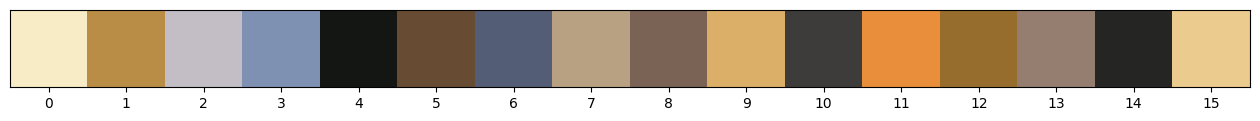

In [44]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)